In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

%matplotlib inline

# Python script / main example

```python
def function_one(x):
    return(x)


def function_two(x):
    return(x)


def main():
    print('function_one')
    function_one()

    print('function_two')
    function_two()

    
if __name__ == '__main__':
    main()
```

# Dealing with NaNs and basic np array manipulation

In [2]:
arr = np.array([[1, 2 ,3, np.nan], [11, 21 ,31, 41]])
arr

array([[ 1.,  2.,  3., nan],
       [11., 21., 31., 41.]])

In [3]:
arr[0,:]

array([ 1.,  2.,  3., nan])

In [4]:
arr[1,:]

array([11., 21., 31., 41.])

In [5]:
arr[:,0]

array([ 1., 11.])

In [6]:
arr[:,3]

array([nan, 41.])

In [7]:
np.nanmean(arr[0,:])

2.0

In [8]:
np.nanmean(arr[1,:])

26.0

In [9]:
np.nanmean(arr[:,3])

41.0

In [10]:
np.array([[1, 2 ,3, np.nan], [11, 21 ,31, 41],  [21, 21 ,21, 21]])[2,:]

array([21., 21., 21., 21.])

# Load from CSV

In [11]:
%ls -R

dellstore/              pandas_prep.ipynb       pandas_training2.ipynb

./dellstore:
orders.csv


In [12]:
orders_df = pd.read_csv(filepath_or_buffer = './dellstore/orders.csv')
orders_df.head()

,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43
2,3,2004-01-17,15399,160.10,13.21,173.31
3,4,2004-01-28,17019,106.67,8.80,115.47
4,5,2004-01-09,14771,256.00,21.12,277.12


In [13]:
orders_df.dtypes

orderid          int64
orderdate       object
customerid       int64
netamount      float64
tax            float64
totalamount    float64
dtype: object

In [14]:
orders_df['orderdate'] = orders_df['orderdate'].apply(lambda x: dt.strptime(x, '%Y-%m-%d'))
orders_df.dtypes

orderid                 int64
orderdate      datetime64[ns]
customerid              int64
netamount             float64
tax                   float64
totalamount           float64
dtype: object

# Setting / resetting index

In [15]:
orders_df.set_index('orderdate').head()

,orderid,customerid,netamount,tax,totalamount
orderdate,,,,,
2004-01-27,1,7888,313.24,25.84,339.08
2004-01-01,2,4858,54.90,4.53,59.43
2004-01-17,3,15399,160.10,13.21,173.31
2004-01-28,4,17019,106.67,8.80,115.47
2004-01-09,5,14771,256.00,21.12,277.12


In [16]:
orders_df.set_index('orderdate').reset_index().head()

,orderdate,orderid,customerid,netamount,tax,totalamount
0,2004-01-27,1,7888,313.24,25.84,339.08
1,2004-01-01,2,4858,54.90,4.53,59.43
2,2004-01-17,3,15399,160.10,13.21,173.31
3,2004-01-28,4,17019,106.67,8.80,115.47
4,2004-01-09,5,14771,256.00,21.12,277.12


# Get rows by index

In [17]:
orders_df[0:3]

,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43
2,3,2004-01-17,15399,160.10,13.21,173.31


In [18]:
orders_df.loc[:2]

,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43
2,3,2004-01-17,15399,160.10,13.21,173.31


In [19]:
orders_df.iloc[:2]

,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43


# Sort rows

In [20]:
orders_df.sort_values(['orderdate', 'orderid'], ascending = [True, False])

,orderid,orderdate,customerid,netamount,tax,totalamount
966,967,2004-01-01,2753,65.43,5.40,70.83
944,945,2004-01-01,11138,48.50,4.00,52.50
894,895,2004-01-01,19149,124.77,10.29,135.06
876,877,2004-01-01,9819,120.85,9.97,130.82
769,770,2004-01-01,14844,54.33,4.48,58.81
747,748,2004-01-01,18212,105.15,8.67,113.82
742,743,2004-01-01,7237,92.22,7.61,99.83
708,709,2004-01-01,1595,392.67,32.40,425.07
689,690,2004-01-01,12116,100.73,8.31,109.04
672,673,2004-01-01,16545,81.98,6.76,88.74


# Filter rows

In [21]:
orders_df[(orders_df['totalamount'] < 5) & (orders_df['orderdate'] < dt.strptime('2004-02-01', '%Y-%m-%d'))]

,orderid,orderdate,customerid,netamount,tax,totalamount
88,89,2004-01-29,2284,0.02,0.00,0.02
188,189,2004-01-25,8185,3.56,0.29,3.85
199,200,2004-01-10,13076,3.75,0.31,4.06
302,303,2004-01-24,18535,0.91,0.08,0.99
458,459,2004-01-30,11873,4.04,0.33,4.37
461,462,2004-01-15,5776,2.46,0.20,2.66
503,504,2004-01-24,11774,1.72,0.14,1.86
512,513,2004-01-01,2569,0.59,0.05,0.64
783,784,2004-01-30,19765,1.09,0.09,1.18
878,879,2004-01-19,10034,0.36,0.03,0.39


# Distinct rows

In [22]:
df = pd.DataFrame({'a': [1, 2, 2, 3], 'b': [11, 22, 22, 33]})
df

,a,b
0,1,11
1,2,22
2,2,22
3,3,33


In [23]:
df.drop_duplicates()

,a,b
0,1,11
1,2,22
3,3,33


# Aggregation

In [24]:
orders_df.head()

,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43
2,3,2004-01-17,15399,160.10,13.21,173.31
3,4,2004-01-28,17019,106.67,8.80,115.47
4,5,2004-01-09,14771,256.00,21.12,277.12


In [25]:
orders_df \
.groupby('orderdate')['orderid'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'orderid': 'n_daily_orders'}) \
.head()
#.reset_index() \


,n_daily_orders
orderdate,
2004-01-01,32
2004-01-02,28
2004-01-03,31
2004-01-04,34
2004-01-05,39


In [26]:
orders_df \
.groupby(['orderdate'])[['netamount', 'totalamount']] \
.agg(['count', 'mean'])[[('netamount', 'count'), ('netamount', 'mean')]] \
.head()

netamount            
               count        mean
orderdate                       
2004-01-01        32  138.379688
2004-01-02        28  168.798929
2004-01-03        31  214.067742
2004-01-04        34  222.198824
2004-01-05        39  235.679231

In [27]:
def ninetyth_percentile(x):
    return(np.percentile(x, 90))

In [28]:
ninetyth_percentile([1, 2, 3, 4])

3.7

In [29]:
orders_df \
.groupby('orderdate')['totalamount'] \
.agg(ninetyth_percentile) \
.pipe(pd.DataFrame) \
.rename(columns = {'totalamount' : 'total amount 90th percentile'}) \
.head()

,total amount 90th percentile
orderdate,
2004-01-01,386.490
2004-01-02,340.240
2004-01-03,408.710
2004-01-04,390.749
2004-01-05,387.256


# Window functions - top things

In [30]:
# Top 5 orders per day

orders_df2 = orders_df

orders_df2['rank'] = orders_df2 \
.groupby('orderdate') \
['totalamount'] \
.rank(method = 'dense', ascending = False)

orders_df2 = orders_df2.sort_values(['orderdate', 'totalamount'], ascending = [True, False])

orders_df2[orders_df2['rank'] <= 5].head(15)

,orderid,orderdate,customerid,netamount,tax,totalamount,rank
304,305,2004-01-01,17738,397.26,32.77,430.03,1.0
514,515,2004-01-01,2323,395.80,32.65,428.45,2.0
708,709,2004-01-01,1595,392.67,32.40,425.07,3.0
294,295,2004-01-01,3099,361.87,29.85,391.72,4.0
446,447,2004-01-01,19381,313.55,25.87,339.42,5.0
482,483,2004-01-02,7500,391.59,32.31,423.90,1.0
167,168,2004-01-02,2265,375.65,30.99,406.64,2.0
761,762,2004-01-02,12255,329.70,27.20,356.90,3.0
802,803,2004-01-02,9895,307.71,25.39,333.10,4.0
373,374,2004-01-02,11663,297.77,24.57,322.34,5.0


In [31]:
?pd.DataFrame.rank

In [32]:
# top 5 customers per month

# Store data into another df to not break the original df
orders_df3 = orders_df

# Add month column to data df
def get_month(x):
    return(int(x.month))

orders_df3['month'] = orders_df3['orderdate']. \
apply(lambda x: get_month(x))


# Get number of orders and sum of orders amounts per customer per month
stats_df = orders_df3 \
.groupby(['month', 'customerid']) \
['totalamount'] \
.agg(['count', 'sum'])

# Rank the customers per sum of amounts per month
stats_df['rank'] = stats_df['sum'].groupby('month').rank(method = 'dense', ascending = False)

# Show top 5
stats_df[stats_df['rank'] <= 5] \
.sort_values(['month', 'rank'])# \
#.reset_index()

count     sum  rank
month customerid                     
1     7090            3  680.14   1.0
      8069            2  648.68   2.0
      3340            2  611.11   3.0
      12847           2  586.39   4.0
      160             2  581.32   5.0
2     12463           2  832.40   1.0
      16930           2  795.32   2.0
      12033           2  695.46   3.0
      8489            3  677.38   4.0
      11159           2  661.61   5.0
3     1305            2  709.95   1.0
      12530           2  634.50   2.0
      16974           2  628.26   3.0
      9794            2  614.83   4.0
      10714           2  606.85   5.0
4     9733            3  838.28   1.0
      12286           3  744.68   2.0
      12002           3  638.81   3.0
      2338            2  627.90   4.0
      4726            2  600.74   5.0
5     18540           3  804.85   1.0
      6735            2  704.25   2.0
      15397           2  657.90   3.0
      17297           2  647.13   4.0
      10912           2  637.24   5.0
6     6181            2  740.26   1.0
      12525           2  695.69   2.0
      13622           3  689.76   3.0
      17682           2  669.61   4.0
      14904           2  628.06   5.0
7     10012           2  795.59   1.0
      5074            2  749.34   2.0
      18943           2  509.43   3.0
      17252           2  489.83   4.0
      11103           2  472.70   5.0
8     1848            2  709.02   1.0
      7771            2  660.00   2.0
      17838           2  651.76   3.0
      8121            2  599.27   4.0
      8511            2  589.26   5.0
9     2772            2  736.33   1.0
      19063           2  685.19   2.0
      4007            2  657.00   3.0
      3027            2  636.18   4.0
      4883            2  624.94   5.0
10    13840           2  713.29   1.0
      1206            2  642.75   2.0
      13778           2  603.49   3.0
      14647           3  568.92   4.0
      14620           2  548.59   5.0
11    893             2  850.42   1.0
      5608            2  782.24   2.0
      11455           2  759.20   3.0
      2814            2  683.21   4.0
      12653           2  626.04   5.0
12    4748            2  804.33   1.0
      7191            2  767.53   2.0
      10899           2  729.10   3.0
      10635           2  714.23   4.0
      12057           2  698.87   5.0

# Window functions - Cumulative Distribution

In [33]:
s = pd.Series([9, 5, 3, 5, 5, 4, 6, 5, 5, 8, 7], name = 'value')
df = pd.DataFrame(s)
df.head(10)

,value
0,9
1,5
2,3
3,5
4,5
5,4
6,6
7,5
8,5
9,8


In [34]:
# Get the frequency for each value
stats_df = df \
.groupby('value') \
['value'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'value': 'frequency'})

stats_df.head()

,frequency
value,
3,1
4,1
5,5
6,1
7,1


In [35]:
# Get the pdf for each value
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# Get the cdf for each value
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df.head()

,value,frequency,pdf,cdf
0,3,1,0.090909,0.090909
1,4,1,0.090909,0.181818
2,5,5,0.454545,0.636364
3,6,1,0.090909,0.727273
4,7,1,0.090909,0.818182


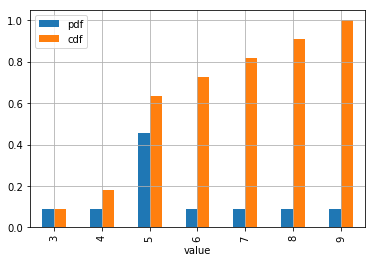

In [36]:
stats_df.plot.bar(x = 'value', y = ['pdf', 'cdf'], grid = True)

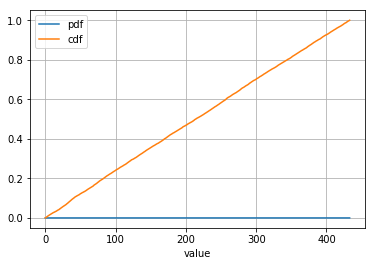

In [65]:
# CDF for our orders data

s = orders_df['totalamount']
df = pd.DataFrame(s).rename(columns = {'totalamount': 'value'})

# Get the frequency for each value
stats_df = df \
.groupby('value') \
['value'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'value': 'frequency'})

# Get the pdf for each value
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# Get the cdf for each value
stats_df['cdf'] = stats_df['pdf'].expanding().sum()
stats_df = stats_df.reset_index()

stats_df.plot(x = 'value', y = ['pdf', 'cdf'], grid = True)

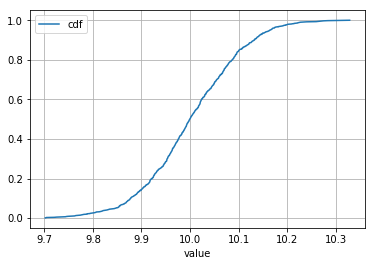

In [38]:
# If there is only one occurence of each value in the sample (typically true for continuous distributions)
s = pd.Series(np.random.normal(loc = 10, scale = 0.1, size = 1000), name = 'value')
df = pd.DataFrame(s)
df['cdf'] = df.rank(method = 'average', pct = True)
df.sort_values('value').plot(x = 'value', y = 'cdf', grid = True)

In [48]:
orders_df.sort_values(['orderdate', 'orderid']).head()

,orderid,orderdate,customerid,netamount,tax,totalamount,rank,month
1,2,2004-01-01,4858,54.90,4.53,59.43,23.0,1
77,78,2004-01-01,19921,145.50,12.00,157.50,11.0,1
130,131,2004-01-01,351,81.68,6.74,88.42,20.0,1
269,270,2004-01-01,3521,31.86,2.63,34.49,28.0,1
278,279,2004-01-01,14331,9.04,0.75,9.79,29.0,1


# Simple expanding windows

In [66]:
# cumsum() is short for expanding().sum()
orders_df.sort_values(['orderdate', 'orderid'])['totalamount'].cumsum().head()

1       59.43
77     216.93
130    305.35
269    339.84
278    349.63
Name: totalamount, dtype: float64

In [69]:
pd.DataFrame.expanding?

In [64]:
orders_df.sort_values(['orderdate', 'orderid'])['totalamount'].expanding().sum().head()

1       59.43
77     216.93
130    305.35
269    339.84
278    349.63
Name: totalamount, dtype: float64

In [63]:
orders_df.sort_values(['orderdate', 'orderid'])['totalamount'].expanding().max().head()

1       59.43
77     157.50
130    157.50
269    157.50
278    157.50
Name: totalamount, dtype: float64

# Retention

In [73]:
orders_df = pd.read_csv(filepath_or_buffer = './dellstore/orders.csv')
orders_df['orderdate'] = orders_df['orderdate'].apply(lambda x: dt.strptime(x, '%Y-%m-%d'))
orders_df.head()

,orderid,orderdate,customerid,netamount,tax,totalamount
0,1,2004-01-27,7888,313.24,25.84,339.08
1,2,2004-01-01,4858,54.90,4.53,59.43
2,3,2004-01-17,15399,160.10,13.21,173.31
3,4,2004-01-28,17019,106.67,8.80,115.47
4,5,2004-01-09,14771,256.00,21.12,277.12


In [74]:
# Add months
orders_df['month'] = orders_df['orderdate'].apply(lambda x: get_month(x))
orders_df.head()

,orderid,orderdate,customerid,netamount,tax,totalamount,month
0,1,2004-01-27,7888,313.24,25.84,339.08,1
1,2,2004-01-01,4858,54.90,4.53,59.43,1
2,3,2004-01-17,15399,160.10,13.21,173.31,1
3,4,2004-01-28,17019,106.67,8.80,115.47,1
4,5,2004-01-09,14771,256.00,21.12,277.12,1


In [80]:
# Get cohorts
cohorts_df = orders_df \
.groupby('customerid')['month'] \
.agg('min') \
.pipe(pd.DataFrame) \
.rename(columns = {'month': 'join_month'})

cohorts_df.head()

,join_month
customerid,
2,11
3,3
6,10
7,7
11,2


In [89]:
# Cohort activity
activity_df = pd.merge(orders_df, cohorts_df,
                       how = 'inner',
                       left_on = 'customerid',
                       right_index = True)

activity_df['activity_index'] = activity_df['month'] - activity_df['join_month']

activity_df = activity_df[activity_df['activity_index'] != 0]
activity_df = activity_df[['customerid', 'join_month', 'activity_index']]
activity_df.head()

,customerid,join_month,activity_index
11475,4858,1,11
2270,15399,1,2
2027,17019,1,2
3364,17019,1,3
7916,17019,1,7


In [96]:
cohort_size_df = cohorts_df \
.reset_index() \
.groupby('join_month') \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'customerid': 'cohort_size'}) \
.reset_index() 

cohort_size_df

,join_month,cohort_size
0,1,979
1,2,930
2,3,882
3,4,835
4,5,792
5,6,763
6,7,742
7,8,689
8,9,651
9,10,632


In [102]:
activity_size_df = activity_df \
.groupby(['join_month', 'activity_index']) \
.agg('count') \
.reset_index() \
.rename(columns = {'customerid': 'activity_size'})

activity_size_df.head()

,join_month,activity_index,activity_size
0,1,1,44
1,1,2,48
2,1,3,55
3,1,4,44
4,1,5,49


In [113]:
retention_df = pd.merge(activity_size_df, cohort_size_df,
                     how = 'inner',
                     left_on = 'join_month',
                     right_on = 'join_month')

retention_df['retention_pct'] = round(retention_df['activity_size'] * 1.0 / retention_df['cohort_size'] * 100, 2)
retention_df = retention_df.pivot_table(columns='activity_index', index='join_month', values='retention_pct')
retention_df.style.background_gradient(cmap = 'Wistia')

/usr/local/lib/python3.7/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


activity_index,1,2,3,4,5,6,7,8,9,10,11
join_month,,,,,,,,,,,
1,4.49,4.9,5.62,4.49,5.01,4.6,3.68,5.52,4.7,5.21,5.21
2,4.73,5.48,6.13,5.7,3.66,4.95,4.73,4.3,5.38,4.19,nan
3,4.42,5.33,2.95,4.2,4.54,5.67,3.4,5.22,6.69,nan,nan
4,4.43,5.51,4.55,6.59,4.91,4.91,5.15,5.51,nan,nan,nan
5,5.43,5.68,3.41,4.8,5.18,4.92,5.18,nan,nan,nan,nan
6,5.77,4.85,4.98,6.55,4.06,5.64,nan,nan,nan,nan,nan
7,6.47,4.45,5.66,4.72,5.12,nan,nan,nan,nan,nan,nan
8,4.35,4.79,5.37,5.22,nan,nan,nan,nan,nan,nan,nan
9,5.53,5.22,4.3,nan,nan,nan,nan,nan,nan,nan,nan


# Top 5 customers per month

In [125]:
df = orders_df \
.groupby(['month', 'customerid'])['totalamount'] \
.agg('sum') \
.pipe(pd.DataFrame) \
.reset_index() \
.sort_values(['month', 'totalamount'], ascending = [True, False])

df['rank'] = df \
.groupby('month')['totalamount'] \
.rank(method = 'dense', ascending = False)

df[df['rank'] <= 5]

,month,customerid,totalamount,rank
364,1,7090,680.14,1.0
408,1,8069,648.68,2.0
156,1,3340,611.11,3.0
628,1,12847,586.39,4.0
8,1,160,581.32,5.0
1584,2,12463,832.40,1.0
1798,2,16930,795.32,2.0
1561,2,12033,695.46,3.0
1372,2,8489,677.38,4.0
1509,2,11159,661.61,5.0
